In [1]:
# 필요한 파이썬 외장 모듈 다운로드
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# 지하철의 정원을 274로 상수로 지정
N = 274

# 불러올 파일들의 이름을 리스트 형태로 저장
file_list = ["geton.xlsx", "getoff.xlsx", "timetable.xlsx"]


# 엑셀 파일의 지하철 시트들의 목록을 미리 지정
sheet_list = [
    'Banseok', 'Jijock', 'Nonoun','Worldcup','Natcem', 'Guamn', 'Yoosung', 'Gapchun', 'Walpyeon', 'Galma', 'Govcom',
    'Cityhall', 'Tanbang',  'Yongmun', 'Oryong', 'Westdae','Midoffice', 'Midroad',  'Daejeon',  'Daedong','Sinhyun', 'Phanam'
]

# 데이터를 넣을 리스트를 미리 선언(승차, 하차, 반석 행, 판암 행)
On_data_list = []
Off_data_list = []
wk_ac_list = []
wk_dc_list = []

# 현재 파일의 위치를 os 모듈을 통해서 자동으로 불러 변수에 저장
dir_path = os.path.dirname(os.path.abspath("project.ipynb"))

# 불러올 파일들을 현재 주소를 참조해서 파일명으로 검색해서 불러오기
On_file_path = os.path.join(dir_path, file_list[0]) 
Off_file_path = os.path.join(dir_path, file_list[1])
tt_path = os.path.join(dir_path, file_list[2])

# 파일 안에 있는 시트를 위의 지하철 시트에서 차례대로 반복해서 불러와서 리스트에 데이터 프레임 형태로 넣기
for i in range(len(sheet_list)):
    df = pd.read_excel(On_file_path, sheet_name = sheet_list[i])
    On_data_list.append(df)
    

for j in range(len(sheet_list)):
    df = pd.read_excel(Off_file_path, sheet_name = sheet_list[j])
    Off_data_list.append(df)
    
# 시간표 파일은 시트가 하나이므로 각각 불러오기
df_wk_ac = pd.read_excel(tt_path, sheet_name = "wk_ac")
df_wk_dc = pd.read_excel(tt_path, sheet_name = "wk_dc")


In [2]:
# 사용자로부터 입력 받기
# 사용자에게 요일 입력 받기
WKDAY = input("무슨 요일인가요?")
# 사용자에게 시간 입력 받기(input 메소드는 기본적으로 문자열로 받아서 정수형으로 따로 바꾸어주어야 함)
CLSTIME = int(input("몇 시 수업인가요?"))
# 사용자에게 출발역 입력 받기
ORIGIN = input("출발역은 어디인가요?")
# 사용자에게 도착역 입력 받기
DESTI = input("도착역은 어디인가요?")

# 해당 요일에 해당하는 데이터만 따로 받기 위한 리스트 선언
wkday_list_Off = []

wkday_list_On = []

Needed_getondff_list = []

# 사용자로부터 입력 받은 요일은 숫자로 치환하는 리스트
wkday_dict = {"일요일": 0,"월요일": 1,"화요일": 2,"수요일": 3,"목요일": 4,"금요일": 5,"토요일": 6}

# 사용라졸 부터 입력 받은 역을 숫자로 치환하는 리스트
station_list = {
    "반석" : 0, "지족" : 1, "노은" : 3, "월드컵경기장" : 4, "현충원" : 5, "구암" : 6, "유성온천" : 7, "갑천" : 8, "월평" : 9, "갈마" : 10, "정부청사" : 11, "시청" : 12,
    "탄방" : 13, "용문" : 14, "오룡" : 15, "서대전네거리" : 16, "중구청" : 17, "중앙로" : 18, "대전역" : 19, "대동" : 20, "신흥" : 21, "판암" : 22
    }

# 출발역과 도착역 간의 역 갯수 차이를 계산(역방향을 고려해서 숫자가 음수가 나올 수도 있으므로 절댓값 적용 후 정수형으로 만들기)
station_gap = int(abs(station_list[DESTI] - station_list[ORIGIN]))

# 미리 사용할 변수들을 미리 선언
sum_time_On = 0
sum_time_Off = 0

# 출발역에서 도착역의 차이만큼만 반복을 수행
for stations in range(station_list[ORIGIN], station_list[DESTI]):
    
    # 토요일의 경우 1월부터 3월까지 11주차까지 밖에 없으므로 따로 계산
    if wkday_dict[WKDAY] == 6: 
        # 해당 요일에 해당하는 1월부터 3월까지의 데이터를 열로 입력 받기
        for wk in range(0, 11):
            # 각 요일이 7일 마다 반복되어 해당 주차를 지정
            wk = wk * 7 + wkday_dict[WKDAY]
            # 현재 반복되는 역의 위의 지정된 주차의 승차 데이터를 변수에 대입
            row = On_data_list[stations].iloc[wk]
            # 위의 변수를 승차 리스트에 추가
            wkday_list_On.append(row)
            
        # 위에서 해당 요일, 역을 지정했다면 여기서는 해당 시간대를 지정
        for k in range(0, 11):
            # 해당 시간대의 승차 인원을 반복문으로 모두 합침
            sum_time_On += wkday_list_On[k][CLSTIME]
        
        # 합친 데이터를 주차 만큼 반복했으므로 주차만큼 나누어
        # 어느 역의 어느 요일의 특정 시간대의 평균 승차 인원을 구할 수 있음
        GetONAv = sum_time_On // 11
        # 위에서 구한 평균 데이터를 리스트에 추가
        Needed_getondff_list.append(GetONAv)

        # 위의 과정을 하차 데이터에도 똑같이 적용
        for wk_1 in range(0, 11):
            wk_1 = wk_1 * 7 + wkday_dict[WKDAY]
            row_1 = Off_data_list[stations].iloc[wk_1]
            wkday_list_Off.append(row_1)
            
        for l in range(0, 11):
            sum_time_Off += wkday_list_Off[l][tiCLSTIMEme]

        GetOffAv = sum_time_Off // 11
        Needed_getondff_list.append(GetOffAv)

    # 토요일을 제외한 경우는 모두 12주차이므로 else로 따로 계산 수행
    else:
        
        for wk in range(0, 12):
            wk = wk * 7 + wkday_dict[WKDAY]
            row = On_data_list[stations].iloc[wk]
            wkday_list_On.append(row)
        
        for k in range(0, 12):
            sum_time_On += wkday_list_On[k][CLSTIME]
        
        GetONAv = sum_time_On // 12
        Needed_getondff_list.append(GetONAv)

        for wk_1 in range(0, 12):
            wk_1 = wk_1 * 7 + wkday_dict[WKDAY]
            row_1 = Off_data_list[stations].iloc[wk_1]
            wkday_list_Off.append(row_1)
            

        for l in range(0, 12):
            sum_time_Off += wkday_list_Off[l][CLSTIME]
        
        GetOffAv = sum_time_Off // 12
        Needed_getondff_list.append(GetOffAv)

            
print(Needed_getondff_list)
# [1215, 751, 2431, 1503, 3646, 2255]
# 반석 승차 평균, 반석 하차 평균, 지족 승차 평균, 지족 하차 평균, 노은 승차 평균 노은 하차 평균

[1215, 751, 2431, 1503, 3646, 2255, 4862, 3007, 6077, 3758, 7293, 4510, 8508, 5262, 9724, 6014, 10939, 6765, 12155, 7517, 13370, 8269, 14586, 9021, 15801, 9772, 17017, 10524, 18232, 11276, 19448, 12028, 20663, 12779, 21879, 13531, 23094, 14283, 24310, 15035, 25525, 15786, 26741, 16538]


In [3]:
# 각 시간표에 몇 대의 차량이 운행하는지를 구하는 부분
# 데이터를 넣을 리스트를 미리 선언
total_time = []
wk_ac_list = []
wk_dc_list = []
split_list = []
intlist = []

# 아래 리스트에 판암 행, 반석 행 데이터를 할당
wk_ac_list = df_wk_ac.values.T.tolist()
wk_dc_list = df_wk_dc.values.T.tolist()

# 받은 데이터에서 해당 시간대의 데이터의 존재 여부에 따라 시간표를 리스트 형태로 입력 받는 부분
for m in range(121):
    # 만약에 해당 위치의 데이터가 0이면 그대로 추가(원래는 데이터가 없음)
    if wk_ac_list[0][m] == 0:
        split_list.append(wk_ac_list[0][m])
    # else임으로 데이터가 존재하면 콜론(:)을 기준으로 앞뒤로 분리해서 저장
    # 원래 데이터는 "05:30"과 같이 문자열에 콜론을 기준으로 시, 분이 나누어져 있음
    else:
        split_list += wk_ac_list[0][m].split(":")

# 위의 리스트에 넣은 모든 데이터는 문자열 데이터임으로 이를 모두 정수형으로 바꿔서 저장
for string in split_list:
    intlist.append(int(string))

# 바꾼 데이터들을 앞의 시는 지우고 분 시간대만 남겨서 저장
for n in range(121):
    # 0 인 경우는 저장하지 않고 넘기기
    if intlist[n] == 0:
        continue
    else:
        del intlist[n]
# range에서 마지막 데이터는 반복문이 적용되지 못해 앞의 모든 데이터를 모두 적용 후 따로 추가
lastOne = intlist[-1]

# 각 시간 별로 나누기 위한 추가 리스트 선언
temp_list = []
splited_list = []

# 기존 데이터의 배치와 배차 간격으로 인해 몇몇 역들은 다른 역에  1-2번 적게 운영하는 경우가 있음
# 이를 적용하기 위해서 선두의 리스트에서 데이터가 비어 있으면 없는 시간대로 간주하고 시간을 따로 추가
for item in range(120):
    temp_list.append(intlist[item])
    
    if ((item == 0) or (item == 1)):
        splited_list.append(temp_list)
        temp_list = []
    # 만약에 앞의 데이터가 뒤의 데이터보다 크면 시간이 바뀌는 것으로 간주하고 새로운 리스트를 생성
    # 예: 8시 58분, 9시 03분에 지하철이 출발한다고 가정, 58분에 출발하고 다음엔 9시 대의 지하철 임으로
    # 배차 간격이 1시간 이상 차이 나지 않는 이상 8시에서 9시를 넘어가는 다음 열차는 이전 분 단위가 앞에보다 크다
    if intlist[item] > intlist[item+1]:
        splited_list.append(temp_list)
        temp_list = []
    
if temp_list:
     splited_list.append(temp_list)

# 역시 range에서 마지막 데이터는 반복문이 적용되지 못해 앞의 모든 데이터를 모두 적용 후 따로 추가
splited_list[-1].append(lastOne)

length_list = []
# 각 열차의 분 단위 데이터를 받았지만 알고 싶은 것은 해당 시간대에 몇 대의 지하철이 다니는 횟수
# 따라서 각 나누어 놓은 데이터의 길이를 세면 각 시간대의 지하철이 다니는 횟수를 알 수 있음

# 각 시간대 별 지하철의 운행 횟수를 반복문으로 한 리스트에 정리하기
for p in range(len(splited_list)):
    length_list.append(len(splited_list[p]))

print(length_list)



[1, 1, 2, 5, 8, 10, 6, 6, 6, 6, 6, 6, 6, 6, 7, 11, 7, 6, 6, 5, 4]


In [4]:
# 해당 시간대의 지하철 운행 시간 대별 승하차 인원을 구하기 위한 부분

# 필요한 리스트 생성
getonlist = []
getofflist = []
total_list = []
time_list = []
time_inner_list = []

# 위에서 구한 요일, 시간대별 승차 인원 불러오기
for w in range(0, len(Needed_getondff_list),2 ):
    getonlist.append(Needed_getondff_list[w])

# 위에서 구한 요일, 시간대별 하차 인원 불러오기
for v in range(1, len(Needed_getondff_list),2 ):
    getofflist.append(Needed_getondff_list[v])
    
# 하나의 리스트로 합치기
total_list.append(getonlist)
total_list.append(getofflist)

# 승차, 하차 두 번 계산해 주어야 함으로 2번 반복
for aa in range(2):
    
    left_avg = total_list[aa][0]
    mid_avg = total_list[aa][int(len(total_list[aa])/2)]
    right_avg = total_list[aa][-1]

    # 메모리 주소 상의 위치를 고려해서 지정 시간대의 리스트 길이 지정
    length = length_list[CLSTIME-4]
    
    # 그 시간대의 승객 변화량을 알기위해 선행 1차 방정식 구하기
    for bb in range(len(total_list[aa])):
        # 평균값을 가장 그 시간대의 중앙에 있는 승/하차 인원으로 지정
        Aver = int(total_list[aa][bb] / length)
        # 지정 시간대 이후에서 지정 시간대를 뺴고 이전 시간대로 나누어서 기울기(변화량)을 구하기
        slope = int((right_avg - mid_avg) / left_avg)
        # 지정 시간대의 가장 이른 출발 시간을 0으로 잡고 그 시간대의 인원을 구함
        # 이를 바탕으로 전체 시간대의 인원을 구할 수 있음
        alpha = int(Aver - (0.5 * slope * length))

        x = 0
        # 만약 앞뒤를 포함한 시간대에서 사람이 최대 일때
        if left_avg < mid_avg > right_avg:
            x1 = np.linspace(-1, 0, 20)
            x2 = np.linspace(0, 1, 20)
            
            # 두 번째 기울기랑 방정식을 만들어서 적용
            sec_slope = round((mid_avg - left_avg), 2)
            
            y1 = slope * x1 + mid_avg
            y2 = sec_slope * x2 + mid_avg
            
        # 만약 앞뒤를 포함한 시간대에서 사람이 최소 일때
        # 최소임으로 두 개의 일차 방정식으로 각각의 시간대별 인원을 고려
        elif left_avg > mid_avg < right_avg:
            x1 = np.linspace(-1, 0, 20)
            x2 = np.linspace(0, 1, 20)
            
             # 최대일떄와 동일하게 두 번째 기울기랑 방정식을 만들어서 적용
            sec_slope = round(left_avg - mid_avg, 2)
            
            y1 = slope * x1 + mid_avg
            y2 = sec_slope * x2 + mid_avg
            
        # 인원이 증가 또는 감소할 때는 기존의 1차 방정식을 이용
        else:
            y1 = slope * x + alpha
        
        # 지정 시간대를 리스트로 변환    
        final_x = list(range(length))
        
        # 실제 승하차 인원 변화량을 넣기 위한 리스트
        final_x_list = []
        time_inner_list = []
        
        # 반복문을 통해 변화량에 따른 그 값들을 저장
        for r in range(len(final_x)):
            final_y1 = slope * final_x[r] + alpha
            time_inner_list.append(final_y1)
        time_list.append(time_inner_list)


In [5]:
# 위에서 구한 시간대의 변화량을 통해 혼잡도를 구하기
# 각 시간대별 혼잡도를 대입하기 위한 리스트 선언
y_final = []

# 리스트 주소값을 위한 추가 상수 정의
divder = int(len(time_list) /2)

Cur_Congestion = 0
# 혼잡도 공식
# 종점일 때(이전 역의 혼잡도를 고려할 필요가 없음)
# 승차 인원  / 지하철 정원 * 100 (%)
# 종점에서는 출발시 사람이 타기 때문에 하차 인원을 고려할 필요가 없음

# 종점이 아닐 때(이전 역의 혼잡도를 고려해야 함)
# ((이전 혼잡도 / 100 * 정원) + 승차 인원 - 하차 인원) / 정원 * 100

# 아래 코드는 위 공식을 바탕으로 위에서 구한 승차 인원, 하차 인원, 정원을 토대로 도착역에서의 혼잡도를 구함
# 순서대로 각각 대를 반영

for ab in range(len(time_list[0])-1):
    # if문은 반석에서 판암까지, else문은 판암에서 반석까지인 반대 방향을 고려
    if station_list[ORIGIN] < station_list[DESTI]:          
        Cur_Congestion = round(((Cur_Congestion / 100 * N ) + time_list[0][ab+1] - time_list[0 + divder][ab+1]) / N * 100, 2)
        y_final.append(Cur_Congestion)
                
    elif station_list[ORIGIN] > station_list[DESTI]:
        Cur_Congestion = round(((Cur_Congestion / 100 * N ) + time_list[0][ab+1] - time_list[0 + divder][ab+1]) / N * 100, 2)
        y_final.append(Cur_Congestion)
        
print(y_final)

[16.79, 33.58, 50.37, 67.16, 83.95, 100.74, 117.53, 134.32, 151.11]


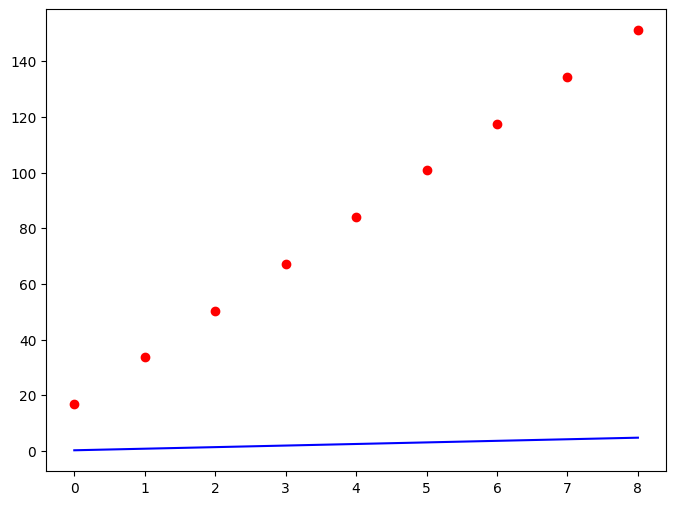

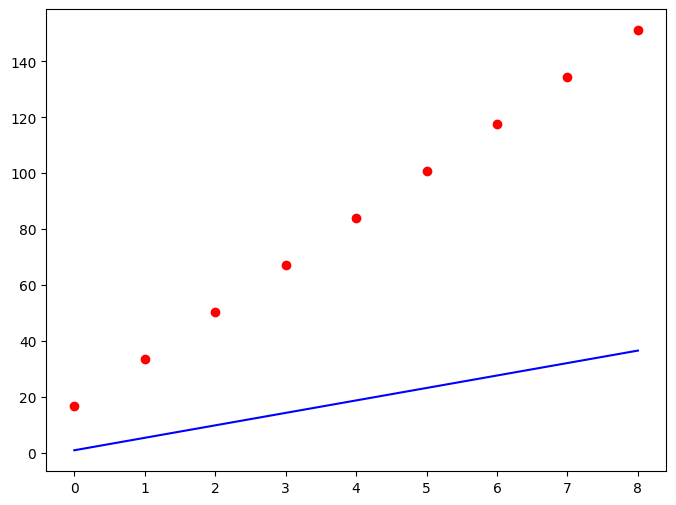

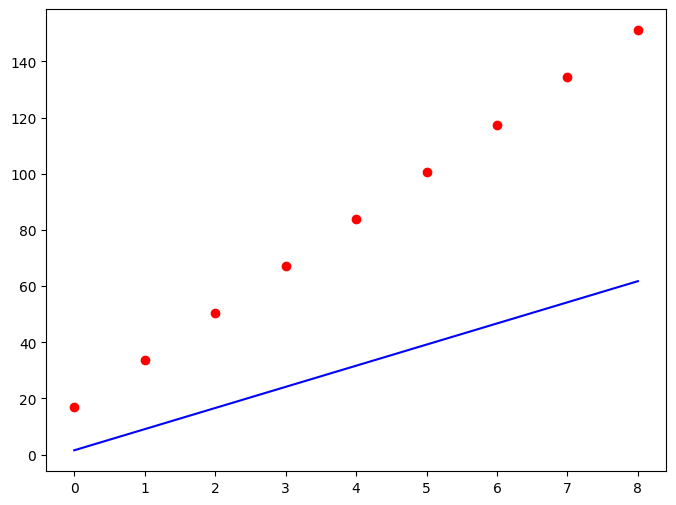

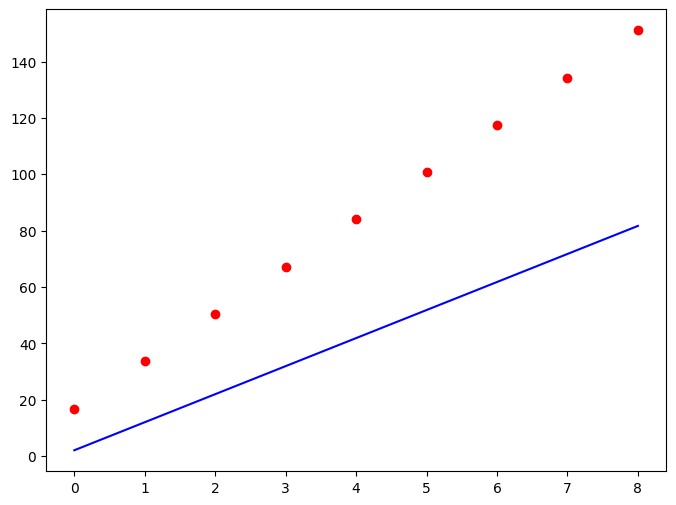

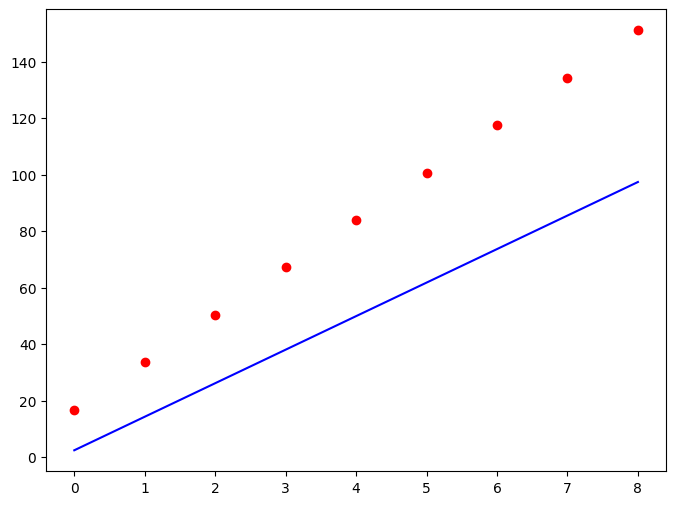

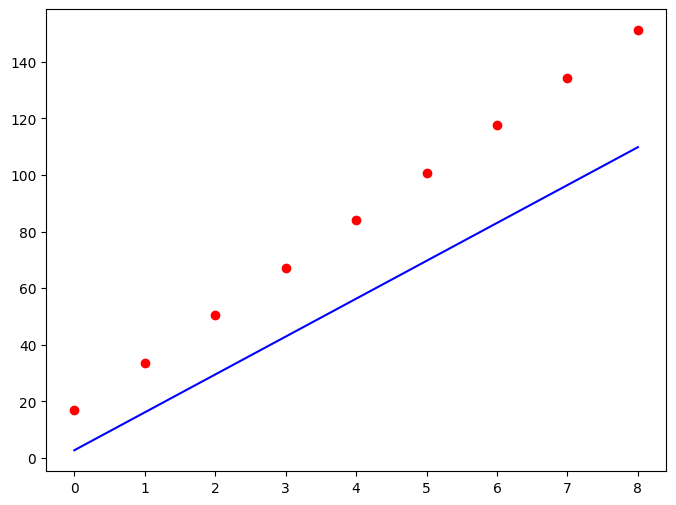

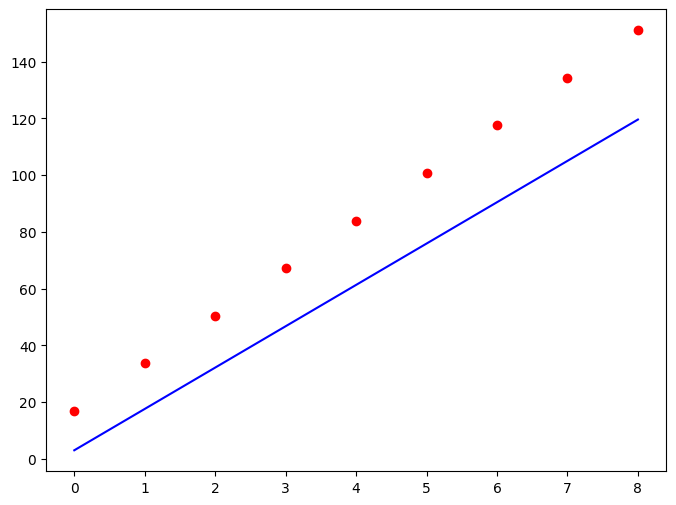

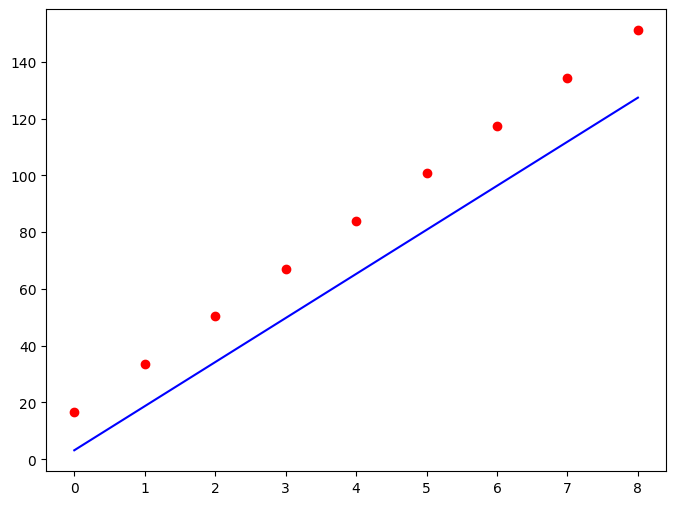

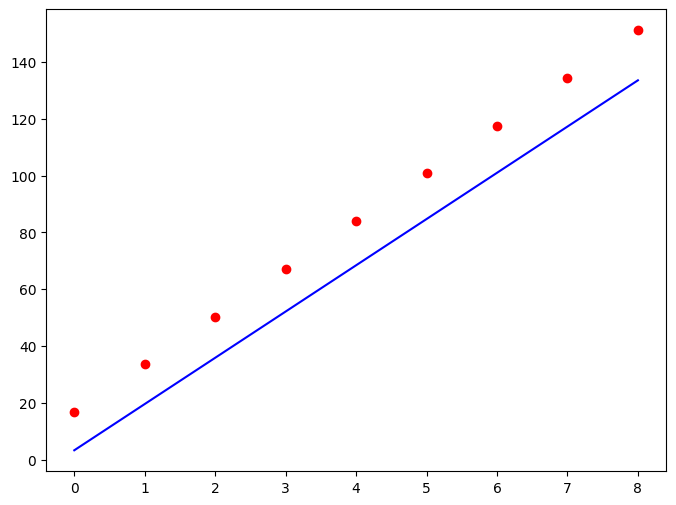

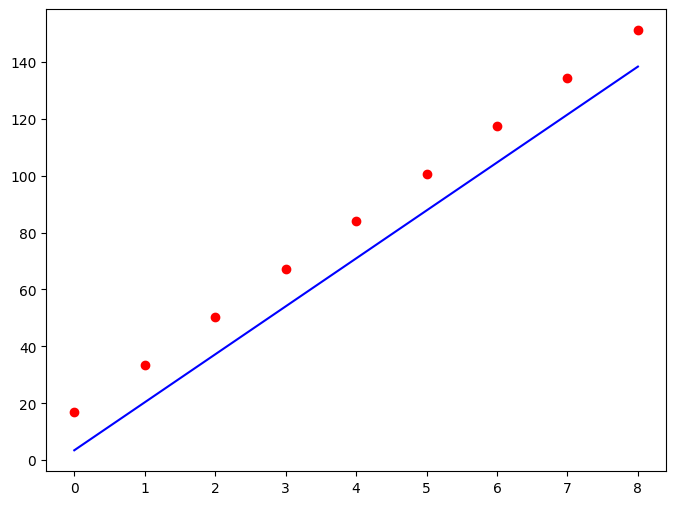

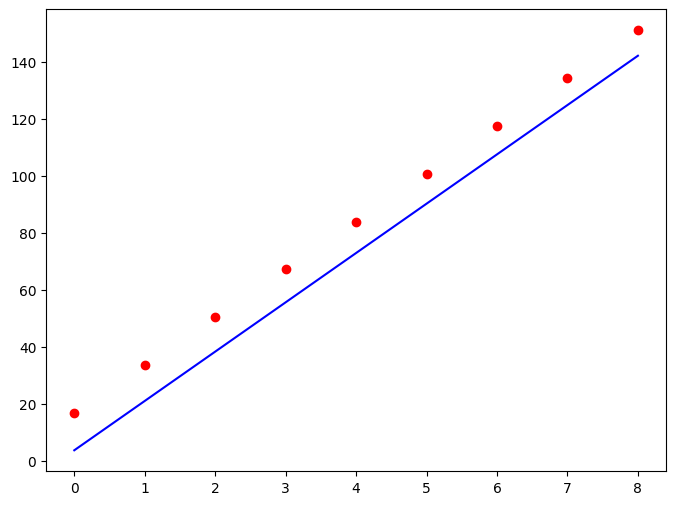

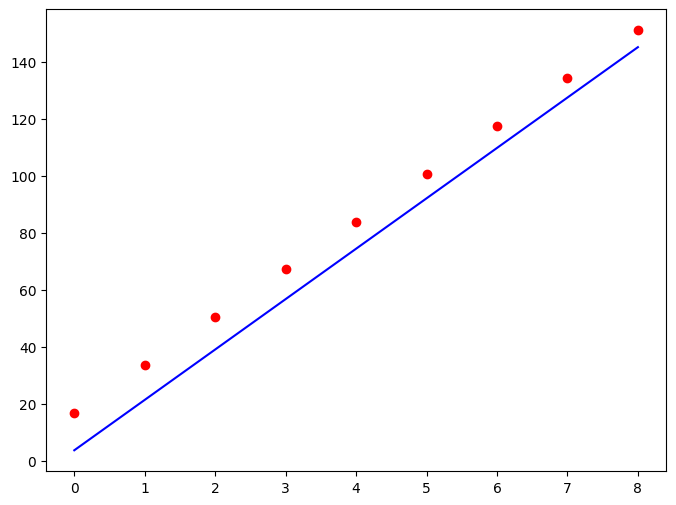

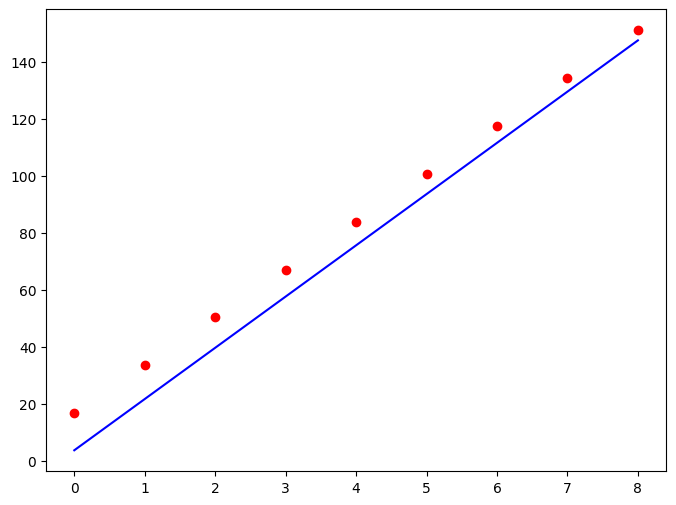

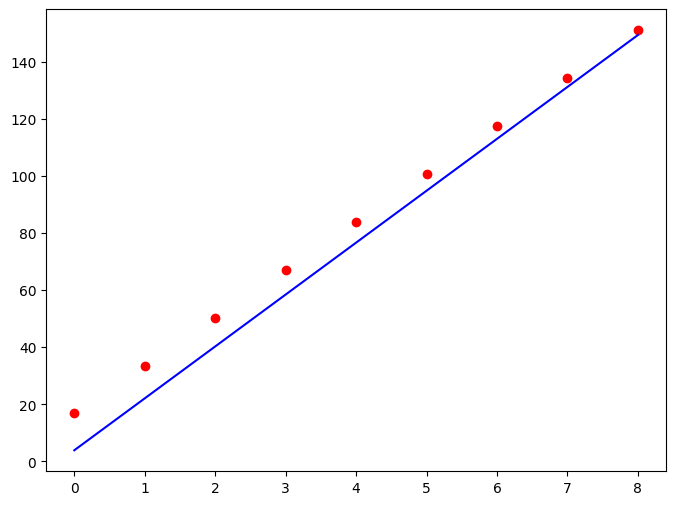

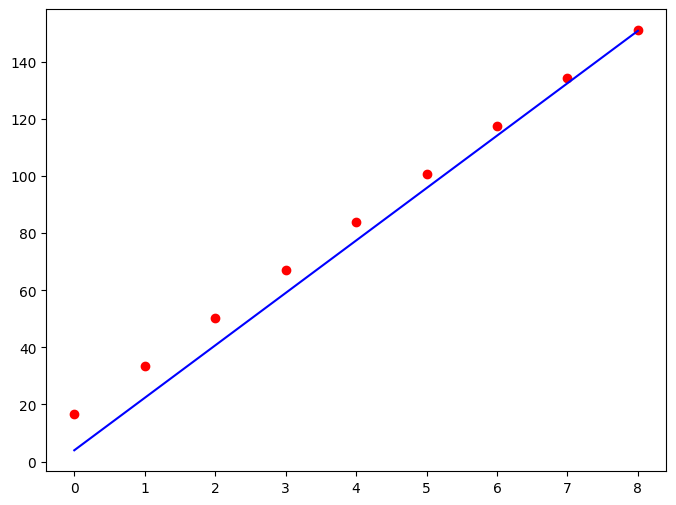

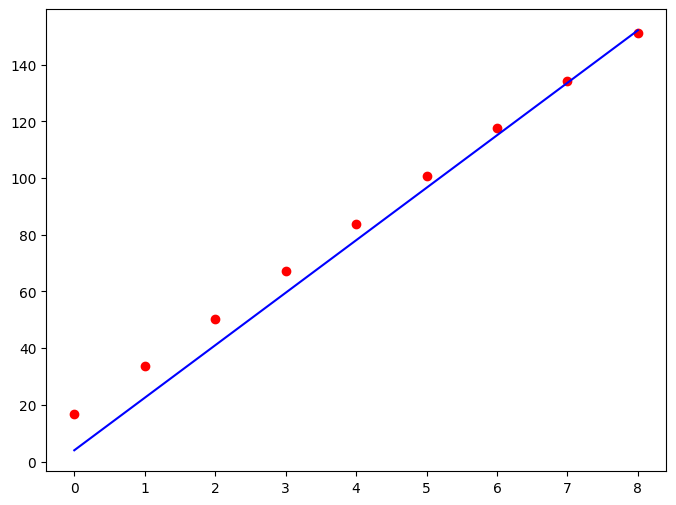

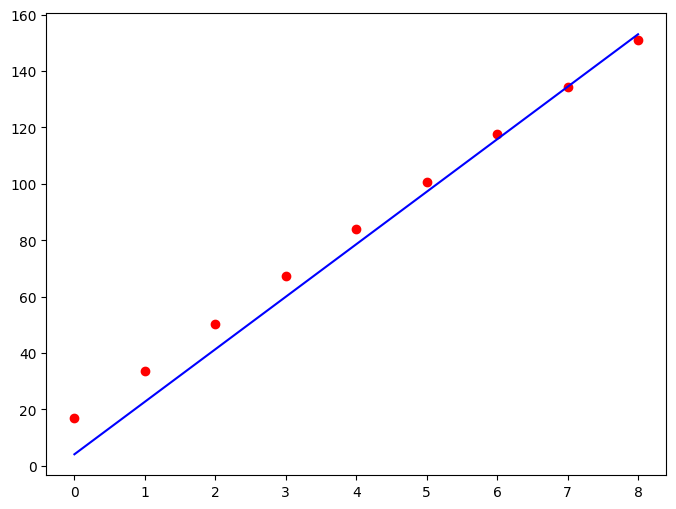

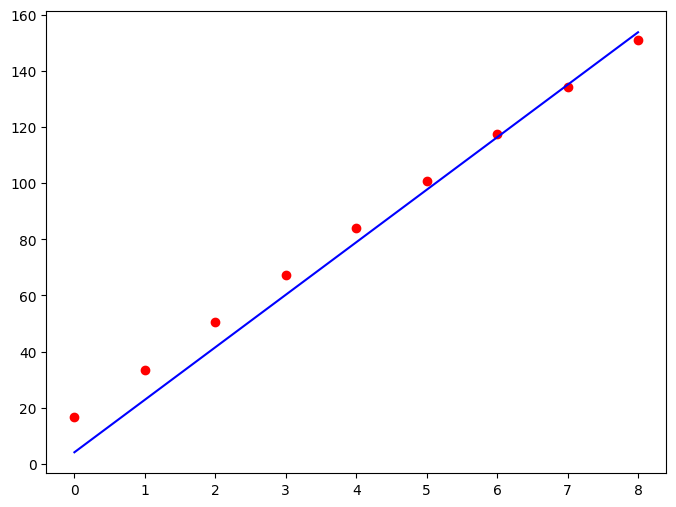

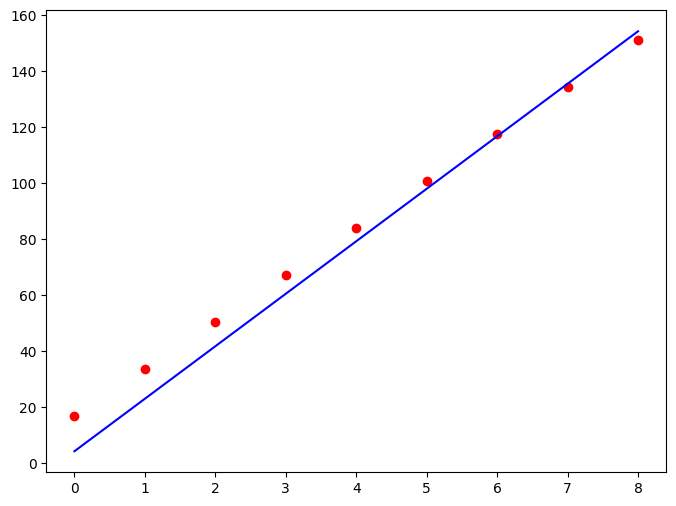

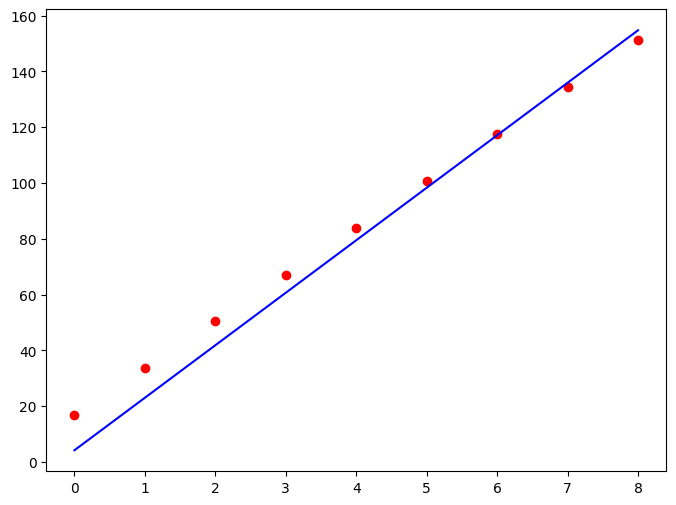

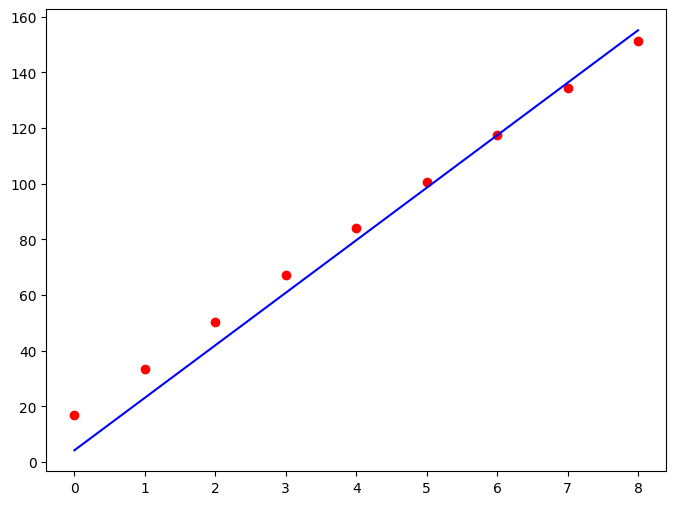

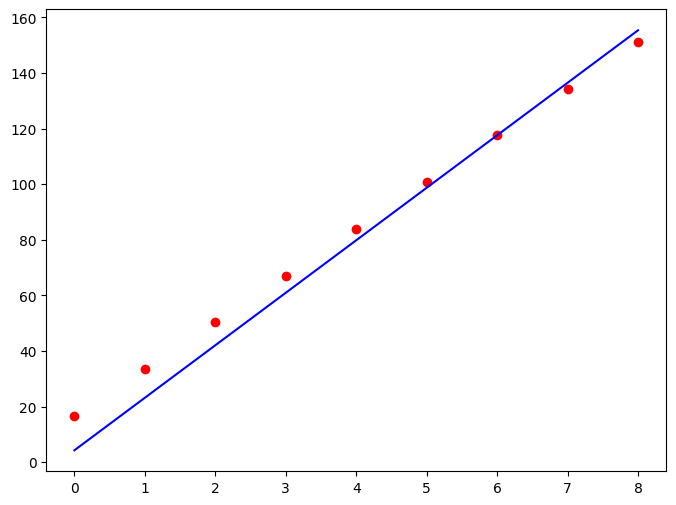

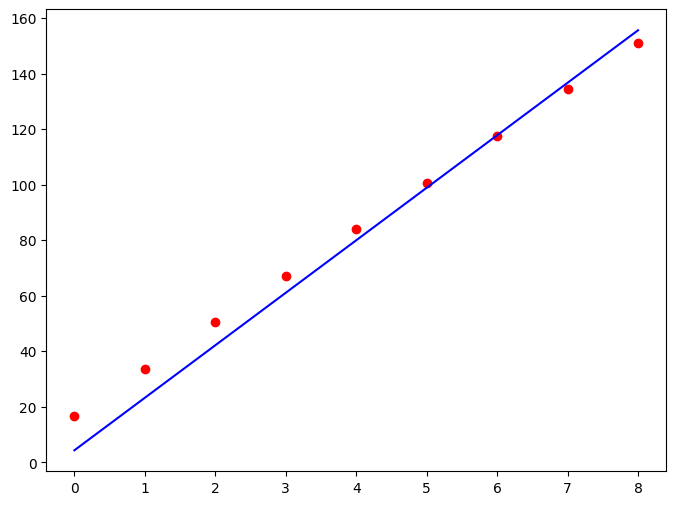

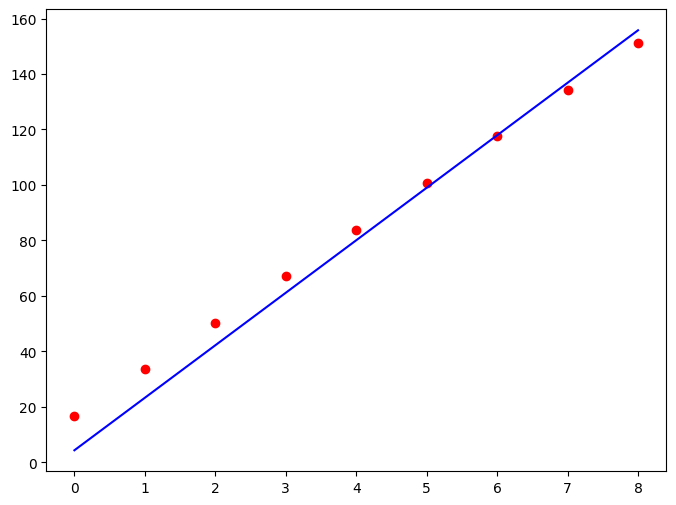

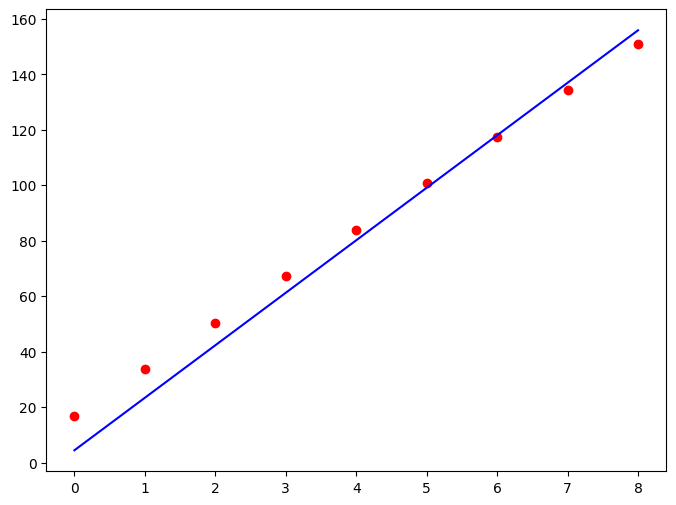

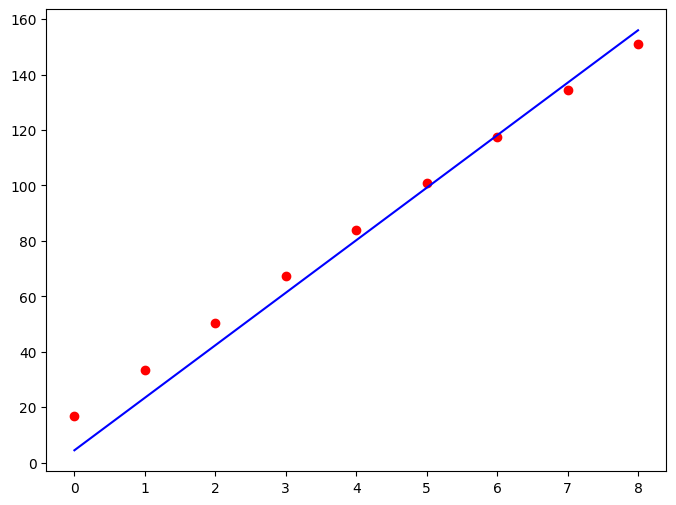

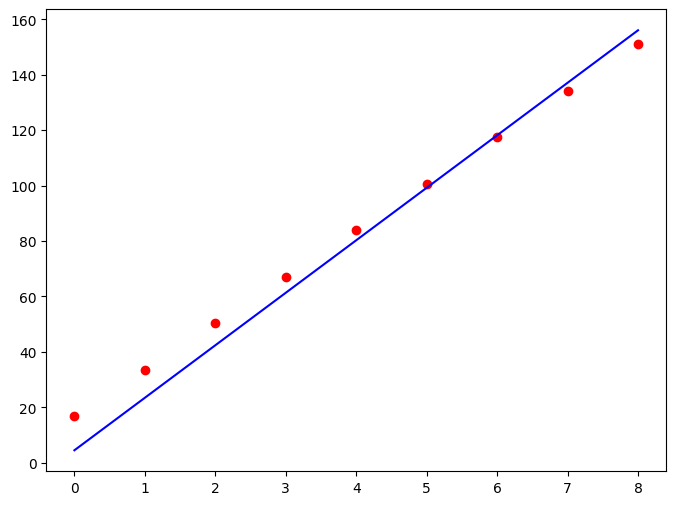

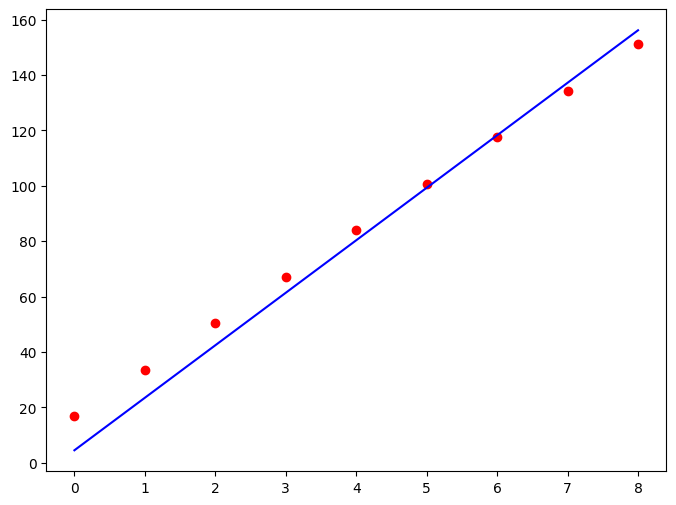

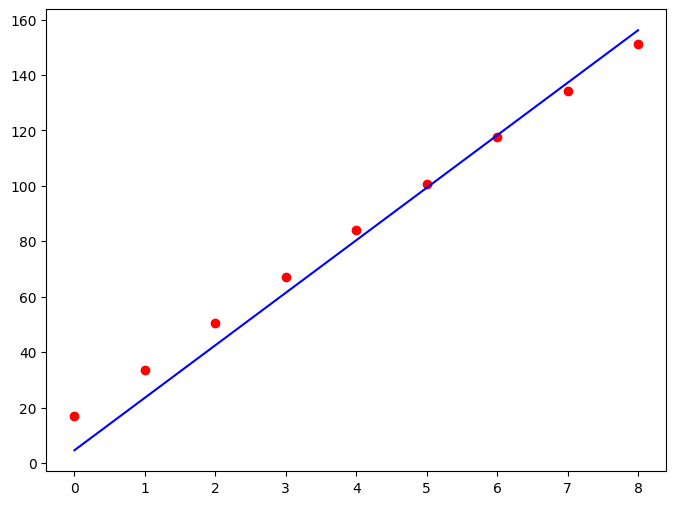

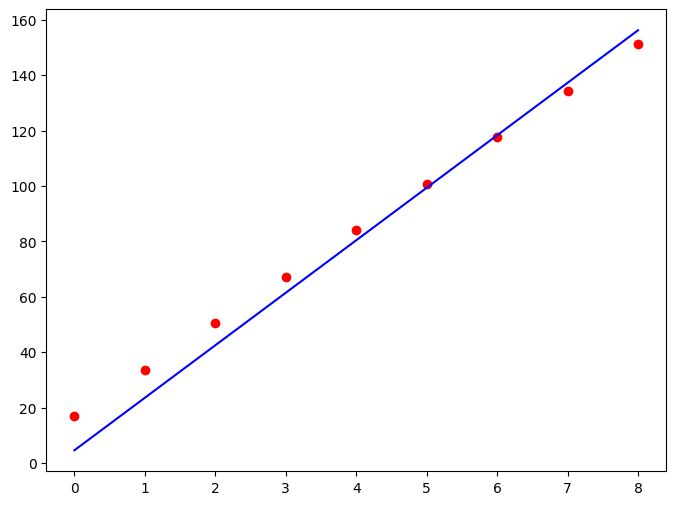

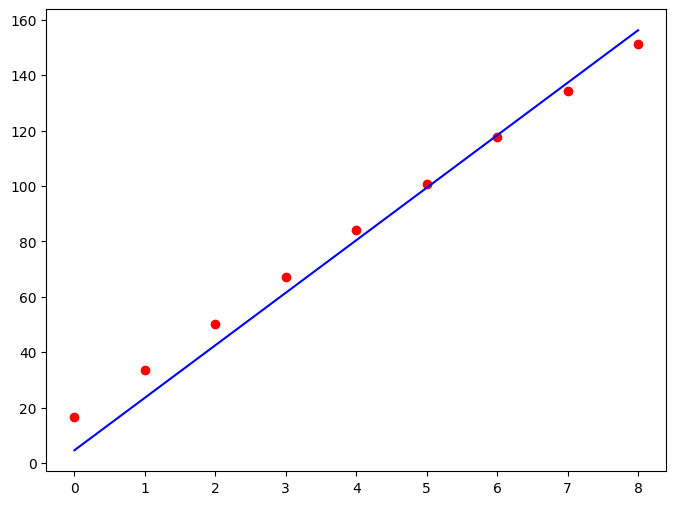

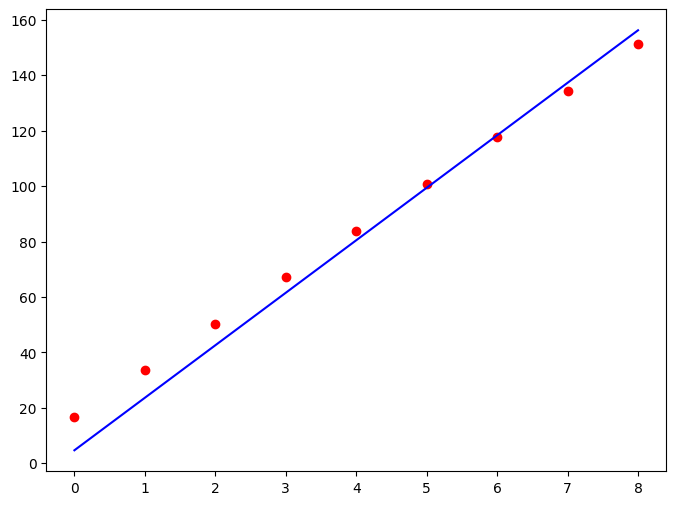

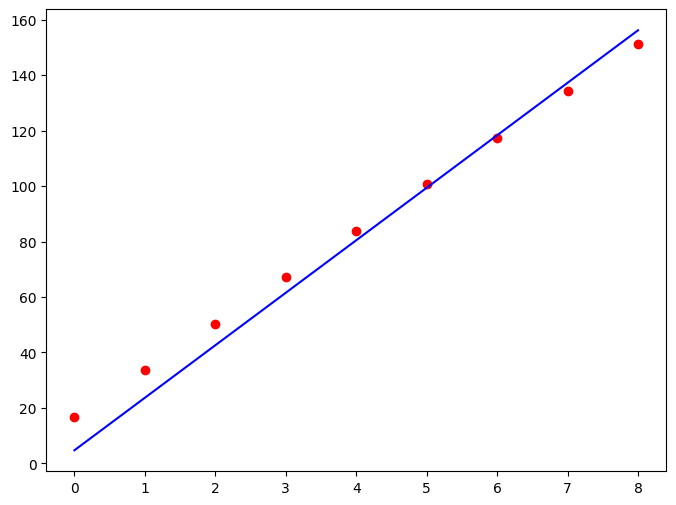

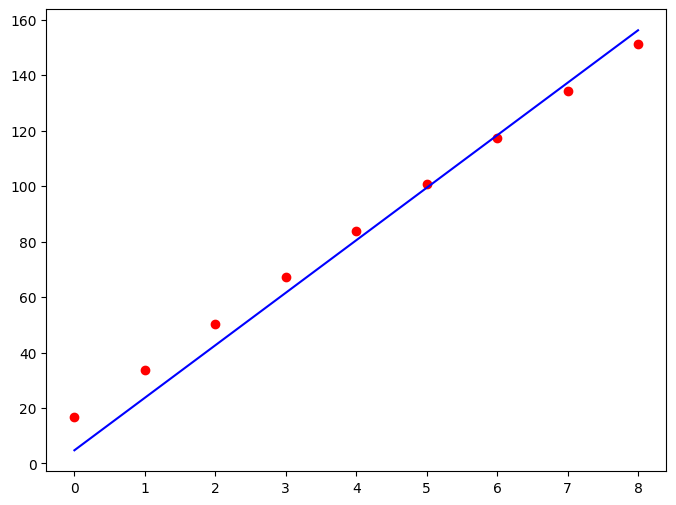

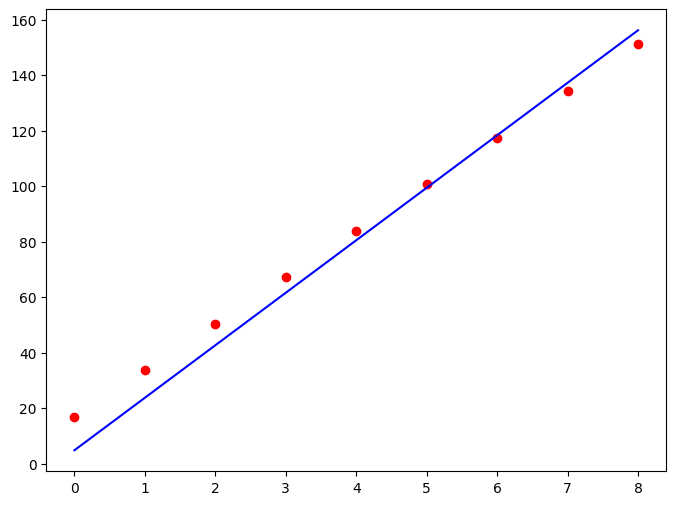

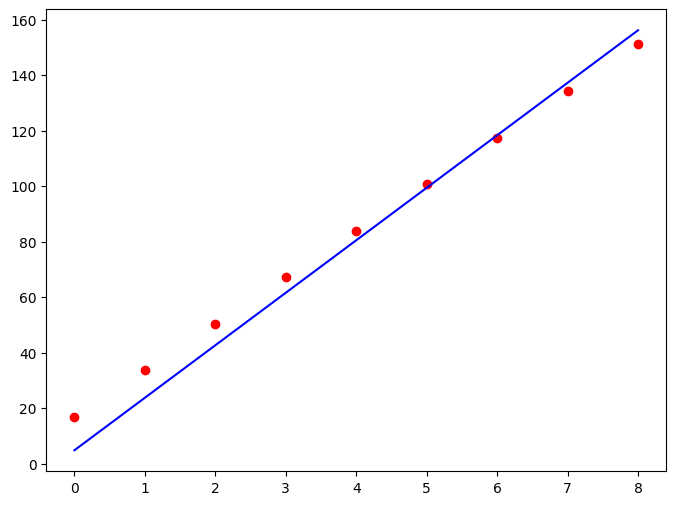

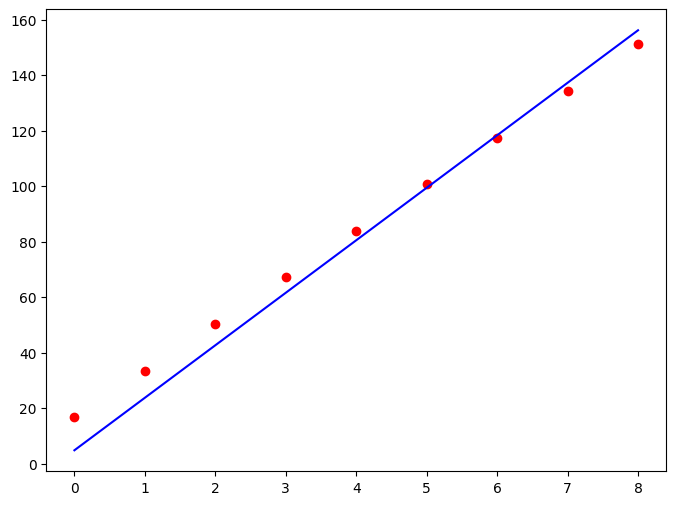

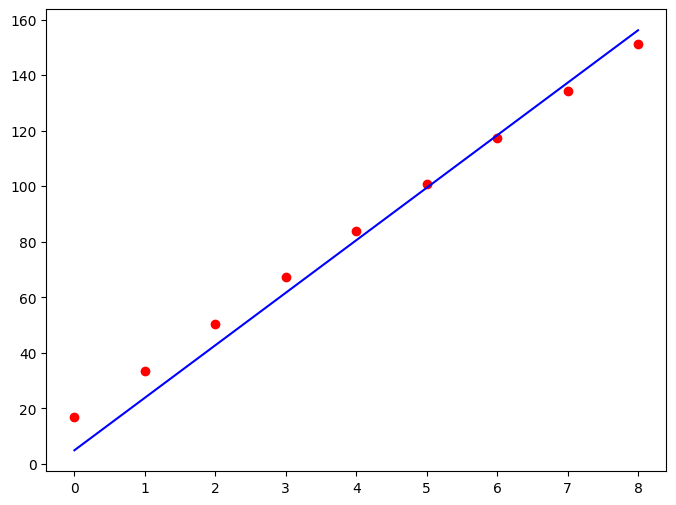

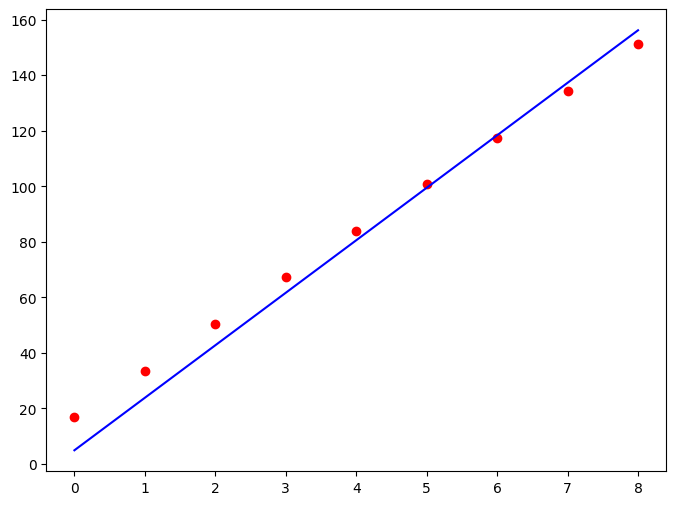

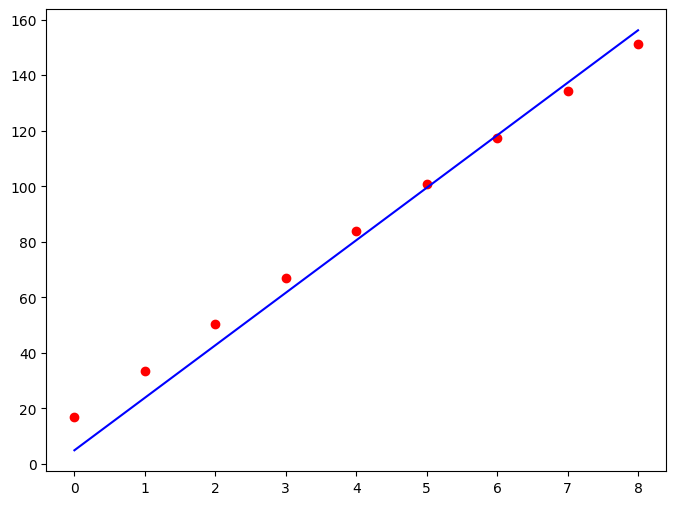

In [6]:

# 해당 시간의 지하철 횟수 만큼 x를 지정
X = np.array(list(range(length-1)))
# 해당 시간대의 각각의 혼잡도
Y = y_final

# 그래프로 나타내기 위한 함수
def plot_prediction(pred, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='red')
    plt.plot(X, pred, color= 'blue')
    plt.show()

a = np.random.uniform(0, 3)
b = np.random.uniform(0, 3)

# 학습률로써 얼마나 값을 하강시켜서 값을 구할 건지에 대한 값
LR = 0.0005
# 에포치 Epoch 몇 번을 반복해서 값을 구해낼 건지에 대한 값
EpNum = 800

# 에포치 만큼 선형 방정식(1차)를 구하고 그 값을 갱신시켜 오차가 최소가 되도록 하는 부분
for epoch in range(EpNum):
    Y_Pred = a * X + b

    error = np.abs(Y_Pred - Y).mean()
    if error < 0.001:
        break

    # 경사 하강 계산
    a_grad = LR * ((Y_Pred - Y)*X).mean()
    b_grad = LR * (Y_Pred - Y).mean()

    # 오차 값을 구하고 그 값을 갱신
    a = a - a_grad
    b = b - b_grad
    
    # 에포치가 400의 배수 일떄 마다 그래프를 보여줌
    # 그래프가 나오지 않아도 계산을 하고 있는 중, 단지 에포치 만큼 수행결과를 보여주기가 오래걸리기 때문
    if epoch % 20 == 0:
        Y_pred = a * X + b
        plot_prediction(Y_Pred, Y)
        
# 위 과정에서 오차 값이 1/1000 이하가 되면 정확하다고 간주하고 반복문을 빠져나옴

In [ ]:
print("From : {} Station, To : {} on {} \n Until {} o'clock".format(ORIGIN,DESTI,WKDAY, CLSTIME))